In [1]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np

In [2]:
#Data set
data = pd.read_csv('yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
data['text_length'] = data['text'].apply(len)

In [7]:
data.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

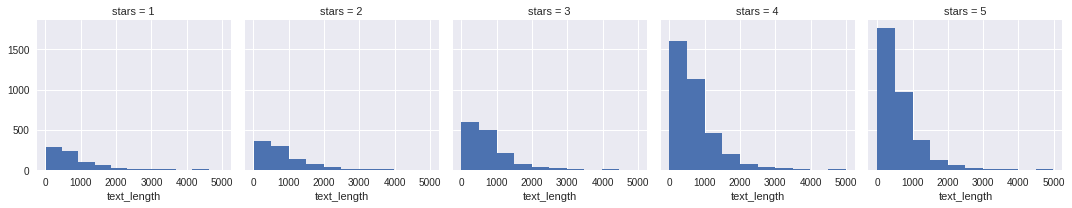

In [9]:
g=sns.FacetGrid(data,col='stars')
g.map(plt.hist,'text_length')

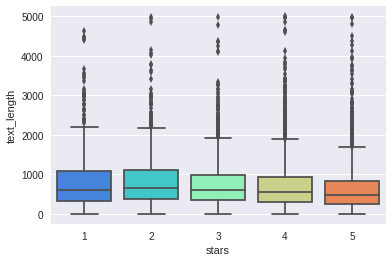

In [10]:
sns.boxplot(x='stars',y='text_length',palette ='rainbow',data =data)

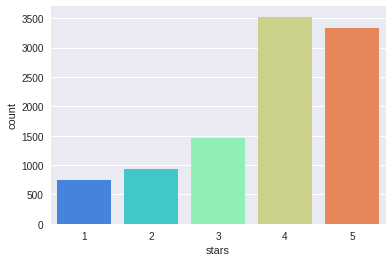

In [11]:
sns.countplot(x='stars',data=data,palette = 'rainbow')

In [12]:
stars_agre = data.groupby('stars').mean()

In [13]:
stars_agre

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [14]:
data.groupby('stars').count()['text']

stars
1     749
2     927
3    1461
4    3526
5    3337
Name: text, dtype: int64

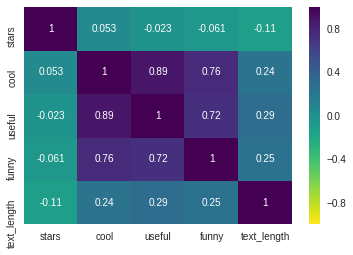

In [15]:
cl = data.corr()
sns.heatmap(cl,cmap='viridis_r',annot =True)

In [16]:
yelp_class = data[(data['stars']==1)|(data['stars']==5)]

In [17]:
X = yelp_class['text']
y = yelp_class['stars']

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer()

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:

X = cv.fit_transform(X)

Train  test split

In [20]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3, random_state=101)

Model creation

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
model = nb.fit(X_train,y_train)

In [23]:
prediction = model.predict(X_test)

In [24]:
confusion_matrix(y_test,prediction)

array([[159,  69],
       [ 22, 976]])

In [25]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# Using text processing

In [26]:
from sklearn.pipeline import Pipeline
import string
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()


In [27]:
def text_clean(m):
    nopunc = [char for char in m if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    nopunc = nopunc.split()
    return  [word for word in nopunc if word not in stopwords.words('english')]

cv  = CountVectorizer(max_features=2000)

In [29]:
#yelp_vt= cv.fit_transform(yelp).toarray()

In [ ]:
#yelp_vt

In [30]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [32]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [33]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_clean at 0x7fab26fac510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [34]:
predict = pipeline.predict(X_test)

In [ ]:
confusion_matrix(predict,y_test)

In [ ]:
print(classification_report(predict,y_test))